<a href="https://colab.research.google.com/github/Juniorexz/Machine-Learning/blob/main/Deteccaoface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpeg"


In [5]:
import cv2 as cv
import numpy as np

image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpg"

# Carregar a imagem
image = cv.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
else:
    # Converter para escala de cinza
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Exibir a imagem
    from google.colab.patches import cv2_imshow  # Para exibição no Colab
    cv2_imshow(image)


Erro: Não foi possível carregar a imagem. Verifique o caminho.


In [7]:
image = cv.imread('/path/to/bastardosinglorios.jpg')


In [8]:
image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpg"


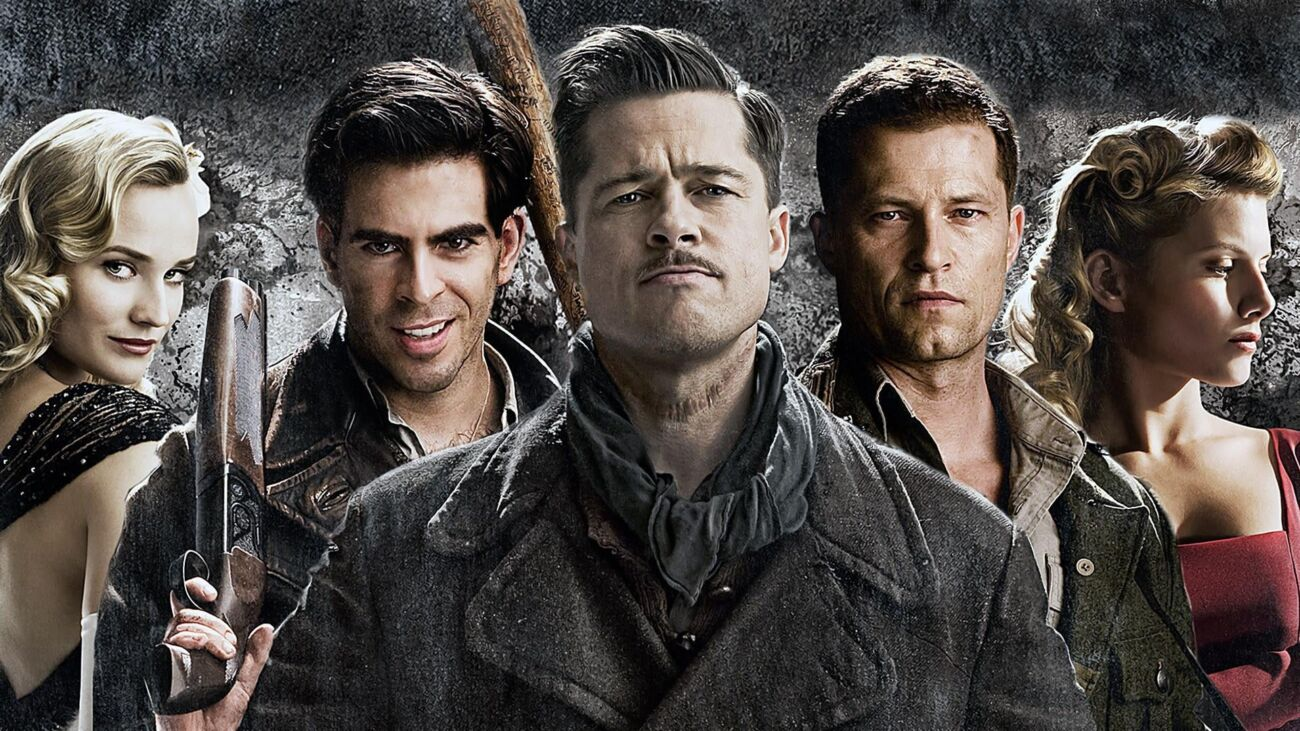

In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow  # Para exibição no Colab

image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpeg"

# Carregar a imagem
image = cv.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
else:
    # Exibir a imagem
    cv2_imshow(image)


In [10]:
import os

# Listar arquivos na pasta para verificar o nome correto
image_folder = "/content/drive/MyDrive/Imagens/"  # Ajuste conforme necessário

if os.path.exists(image_folder):
    print("Arquivos na pasta:", os.listdir(image_folder))
else:
    print("Erro: A pasta não existe! Verifique o caminho.")


Arquivos na pasta: ['bastardosinglorios.jpeg']


Imagem carregada com sucesso!


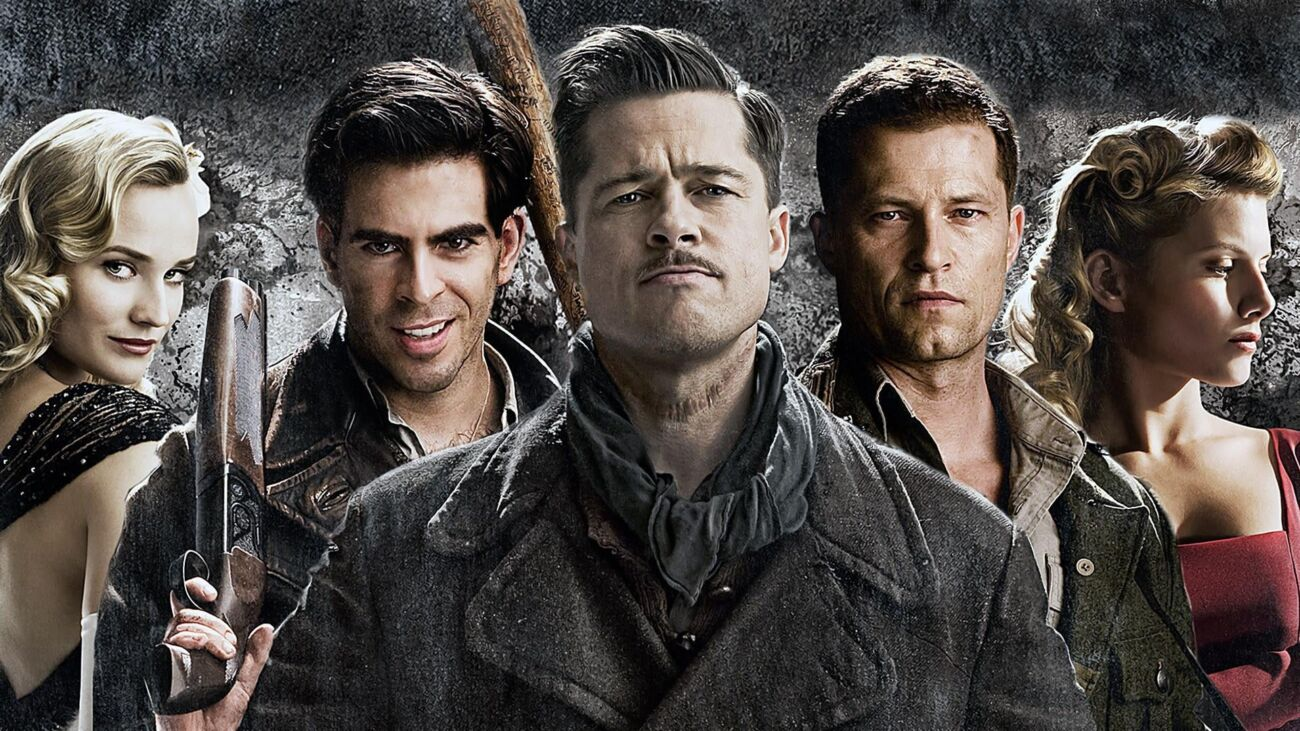

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow  # Para exibir no Colab

# Caminho atualizado da imagem
image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpeg"  # Ajuste conforme necessário

# Testar se a imagem existe antes de carregar
if not os.path.exists(image_path):
    print(f"Erro: Arquivo '{image_path}' não encontrado! Verifique o caminho.")
else:
    # Carregar a imagem
    image = cv.imread(image_path)

    if image is None:
        print("Erro: Não foi possível carregar a imagem. O arquivo pode estar corrompido.")
    else:
        print("Imagem carregada com sucesso!")
        cv2_imshow(image)


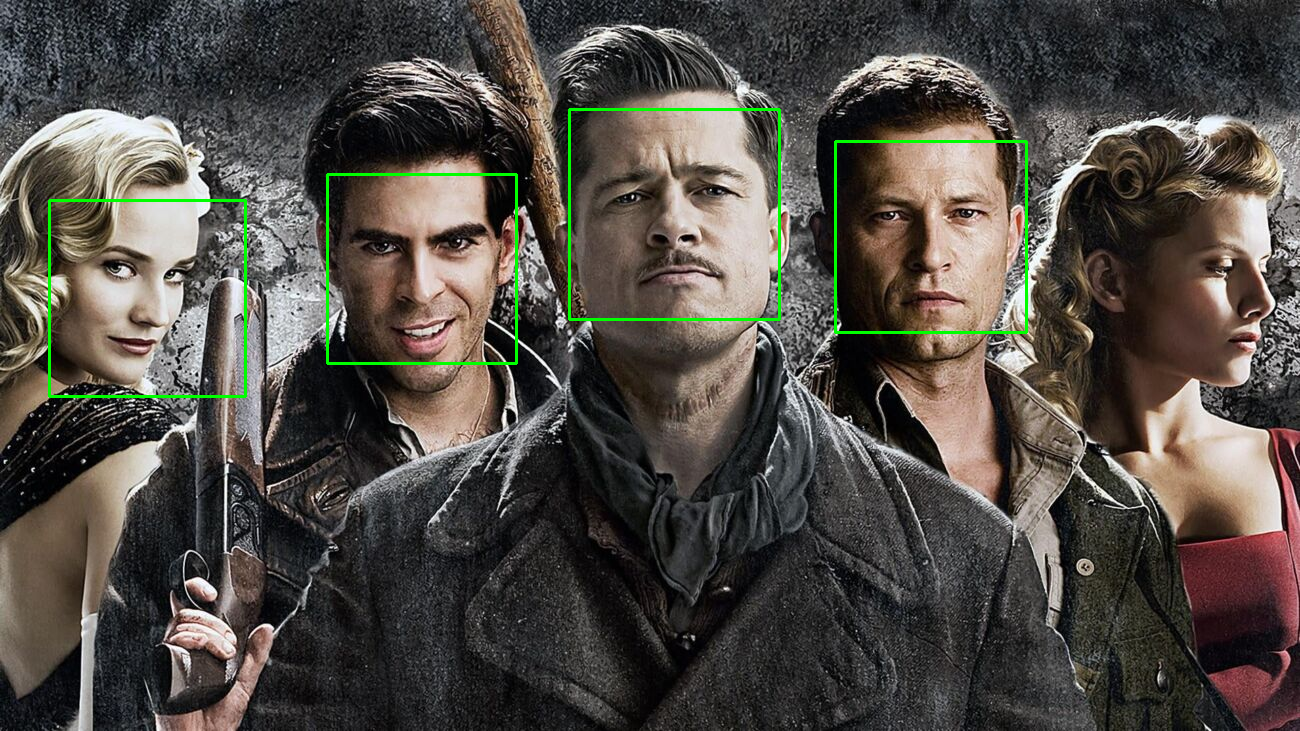

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow  # Alternativa ao cv.imshow()

# Caminho da imagem (verifique se está correto!)
image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpeg"

# Carregar imagem
image = cv.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
else:
    # Converter para escala de cinza (opcional)
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Carregar classificador Haarcascade
    face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detectar faces
    faces = face_classifier.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=5)

    # Desenhar retângulos nas faces detectadas
    for (x, y, w, h) in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibir a imagem com detecção de rostos
    cv2_imshow(image)


 Resumo da Correção

1️⃣ cv.imshow() não funciona no Colab → Substitua por cv2_imshow().
2️⃣ Não use cv.waitKey(0) e cv.destroyAllWindows(), pois não são necessários no Colab.
3️⃣ Certifique-se de que a imagem foi carregada corretamente, senão cv.imread() retorna None.

Agora sua detecção de faces deve funcionar corretamente! Me avise se precisar de mais ajuda. 🚀
Você disse:
não reconheceu todas as faces da imagem
O ChatGPT disse:

Se a detecção de rostos não reconheceu todas as faces da imagem, aqui estão algumas razões e soluções para melhorar o resultado.
🔍 Motivos Possíveis e Soluções
1️⃣ Ajustar os Parâmetros do detectMultiScale()

O Haarcascade pode perder algumas faces dependendo do tamanho e da iluminação da imagem. Teste diferentes valores de scaleFactor e minNeighbors:

faces = face_classifier.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3)

    scaleFactor=1.1 → Reduz a escala da imagem em 10% a cada iteração, aumentando a precisão.
    minNeighbors=3 → Diminui a restrição para considerar uma região como rosto. Tente valores entre 3 e 6.

Se estiver detectando muitas falsas faces, aumente minNeighbors.
2️⃣ Usar um Classificador Melhor

O haarcascade_frontalface_default.xml nem sempre é o melhor. Experimente o haarcascade_frontalface_alt2.xml, que é mais robusto:

face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

3️⃣ Aumentar a Qualidade da Imagem

Se a imagem estiver muito escura ou de baixa resolução, tente melhorar o contraste:

image_gray = cv.equalizeHist(image_gray)  # Melhora o contraste para ajudar na detecção

4️⃣ Redimensionar a Imagem

Se a imagem for muito grande, redimensione para facilitar a detecção:

image_gray = cv.resize(image_gray, (0, 0), fx=0.8, fy=0.8)

Isso reduz o tamanho em 20% e pode melhorar a performance.
✅ Código Melhorado

import cv2 as cv
from google.colab.patches import cv2_imshow

# Caminho da imagem
image_path = "/content/drive/MyDrive/Imagens/bastardosinglorios.jpeg"

# Carregar a imagem
image = cv.imread(image_path)

if image is None:
    print("Erro: Não foi possível carregar a imagem.")
else:
    # Converter para escala de cinza
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Melhorar contraste
    image_gray = cv.equalizeHist(image_gray)

    # Reduzir tamanho para melhor detecção (opcional)
    image_gray = cv.resize(image_gray, (0, 0), fx=0.8, fy=0.8)

    # Carregar classificador mais preciso
    face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

    # Ajustar parâmetros para melhor detecção
    faces = face_classifier.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3)

    # Desenhar retângulos nos rostos detectados
    for (x, y, w, h) in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibir imagem com detecção
    cv2_imshow(image)

🔥 Resultados Esperados

✔ Melhor detecção de rostos, mesmo em imagens difíceis.
✔ Menos falhas causadas por iluminação ou tamanho da imagem.
✔ Classificador mais eficiente (haarcascade_frontalface_alt2.xml).

Se ainda não reconhecer todas as faces, tente scaleFactor=1.05 ou minNeighbors=2. Se precisar de mais precisão, podemos usar redes neurais (dnn do OpenCV ou MTCNN)! 🚀

Me avise se precisar de mais ajustes! 😃
